In [5]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [6]:
fishs = ['щука', 'судак', 'окунь', 'берш', 'речная форель', 'озерная форель', 'елец', 'чехонь', 'сом', 'голавль', 'язь',
         'карп', 'жерех', 'лещ', 'карась', 'линь', 'пескарь', 'ротан', 'плотва', 'красноперка', 'налим', 'густера',
         'амур', 'ерш', 'сазан', 'подуст', 'толстолобик', 'вобла', 'хариус']

In [7]:
dt = pd.read_csv('forecast1.csv', sep=';')
dt

,day_temp,day_pressure,day_obl,day_phen,day_dir,day_wind,areal,city,year,month,...,красноперка,налим,густера,амур,ерш,сазан,подуст,толстолобик,вобла,хариус
0,-4,749,dull,snow,Ю,3,Алтайский край,Барнаул,2020,1,...,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1,-1.0
1,-1,750,dull,-,Ю,5,Алтайский край,Барнаул,2020,1,...,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1,-1.0
2,-3,749,dull,-,Ю,2,Алтайский край,Барнаул,2020,1,...,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1,-1.0
3,-6,753,dull,-,Ю,1,Алтайский край,Барнаул,2020,1,...,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1,-1.0
4,-2,752,suncl,-,Ю,3,Алтайский край,Барнаул,2020,1,...,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30516,-6,752,dull,-,З,1,Московская область,Щелково,2020,12,...,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1,-1.0
30517,-6,759,sunc,-,ЮВ,1,Московская область,Щелково,2020,12,...,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1,-1.0
30518,-5,754,dull,-,ЮВ,3,Московская область,Щелково,2020,12,...,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1,-1.0
30519,-3,753,dull,-,-,0,Московская область,Щелково,2020,12,...,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1,-1.0


In [8]:
dt[['day_temp', 'day_pressure', 'day_wind']].describe()

,day_temp,day_pressure,day_wind
count,30521.000000,30521.000000,30521.000000
mean,9.887618,740.352806,3.155041
std,12.342970,31.776627,2.051422
min,-43.000000,565.000000,0.000000
25%,1.000000,739.000000,2.000000
50%,10.000000,748.000000,3.000000
75%,20.000000,755.000000,4.000000
max,41.000000,785.000000,44.000000


In [9]:
dt[dt['щука'] > - 1]

,day_temp,day_pressure,day_obl,day_phen,day_dir,day_wind,areal,city,year,month,...,красноперка,налим,густера,амур,ерш,сазан,подуст,толстолобик,вобла,хариус
142,17,751,dull,storm,З,1,Алтайский край,Барнаул,2020,5,...,1,0.0,1,0,1,0.0,1,1,0,1.0
143,23,752,suncl,-,З,1,Алтайский край,Барнаул,2020,5,...,1,0.0,1,1,1,0.0,1,1,0,1.0
144,22,751,dull,-,ЮЗ,1,Алтайский край,Барнаул,2020,5,...,1,0.0,1,1,1,0.0,1,1,0,1.0
152,25,740,sun,-,С,2,Алтайский край,Барнаул,2020,6,...,1,0.0,1,1,1,0.0,1,1,1,1.0
198,32,744,sunc,-,СВ,2,Алтайский край,Барнаул,2020,7,...,1,0.0,1,1,1,1.0,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29138,10,745,suncl,-,Ю,3,Московская область,Одинцово,2020,3,...,1,1.0,1,0,1,0.0,0,0,0,0.0
29183,10,736,sun,-,СЗ,8,Московская область,Одинцово,2020,4,...,0,0.0,1,0,1,0.0,0,0,0,0.0
29278,26,746,dull,-,Ю,5,Московская область,Одинцово,2020,7,...,1,0.0,1,1,1,1.0,1,1,1,1.0
29651,25,749,sun,-,ЮЗ,3,Московская область,Подольск,2020,8,...,1,0.0,1,1,1,1.0,1,1,1,1.0


In [10]:
train_data = []
shift_len = 0
for idx, row in tqdm(dt.iterrows()):
    if row['щука'] > -1:
        data = dt[idx - shift_len: idx + 1]
        temps = list(data['day_temp'])
        press = list(data['day_pressure'])
        obls = list(data['day_obl'])
        phens = list(data['day_phen'])
        dirs = list(data['day_dir'])
        winds = list(data['day_wind'])
        areal = row['areal']
        month = row['month']
        day = row['day']
        for fish in fishs:
            row_ = {'areal': areal, 'month': month, 'day': day, 'fish': fish, 'forecast': row[fish]}
            for k in range(len(temps)):
                row_.update({
                    'temperature_{}'.format(k): temps[shift_len - k],
                    'pressure_{}'.format(k): press[shift_len - k],
                    'obl_{}'.format(k): obls[shift_len - k],
                    'phenomen_{}'.format(k): phens[shift_len - k],
                    'wind_direction_{}'.format(k): dirs[shift_len - k],
                    'winds_{}'.format(k): winds[shift_len - k],
                })
            train_data.append(row_)

In [11]:
train_dt = pd.DataFrame(train_data)

In [12]:
train_dt

,areal,month,day,fish,forecast,temperature_0,pressure_0,obl_0,phenomen_0,wind_direction_0,winds_0
0,Алтайский край,5,22,щука,1.0,17,751,dull,storm,З,1
1,Алтайский край,5,22,судак,0.0,17,751,dull,storm,З,1
2,Алтайский край,5,22,окунь,1.0,17,751,dull,storm,З,1
3,Алтайский край,5,22,берш,0.0,17,751,dull,storm,З,1
4,Алтайский край,5,22,речная форель,1.0,17,751,dull,storm,З,1
...,...,...,...,...,...,...,...,...,...,...,...
2518,Московская область,6,24,сазан,1.0,24,748,-,-,СЗ,3
2519,Московская область,6,24,подуст,1.0,24,748,-,-,СЗ,3
2520,Московская область,6,24,толстолобик,1.0,24,748,-,-,СЗ,3
2521,Московская область,6,24,вобла,1.0,24,748,-,-,СЗ,3


In [13]:
train_dt.describe()

,month,day,forecast,temperature_0,pressure_0,winds_0
count,2523.00000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000
mean,6.62069,15.781609,0.420927,11.908046,743.862069,3.344828
std,3.23210,8.733264,0.493806,13.139927,24.578557,2.186216
min,1.00000,1.000000,0.000000,-26.000000,628.000000,0.000000
25%,4.00000,8.000000,0.000000,2.000000,743.000000,2.000000
50%,6.00000,15.000000,0.000000,14.000000,749.000000,3.000000
75%,9.00000,23.000000,1.000000,22.000000,755.000000,4.000000
max,12.00000,31.000000,1.000000,32.000000,776.000000,11.000000


In [14]:
mean_ = {
    'temperature': 9.887618, 'pressure': 740.352806, 'winds': 3.155041
}

std_ = {
    'temperature': 12.342970, 'pressure': 31.776627, 'winds': 2.051422
}

In [15]:
for key in train_dt.columns:
    if key.split('_')[0] in mean_:
        train_dt[key] = (train_dt[key] - mean_[key.split('_')[0]])/std_[key.split('_')[0]]

In [16]:
train_dt

,areal,month,day,fish,forecast,temperature_0,pressure_0,obl_0,phenomen_0,wind_direction_0,winds_0
0,Алтайский край,5,22,щука,1.0,0.576229,0.335064,dull,storm,З,-1.050511
1,Алтайский край,5,22,судак,0.0,0.576229,0.335064,dull,storm,З,-1.050511
2,Алтайский край,5,22,окунь,1.0,0.576229,0.335064,dull,storm,З,-1.050511
3,Алтайский край,5,22,берш,0.0,0.576229,0.335064,dull,storm,З,-1.050511
4,Алтайский край,5,22,речная форель,1.0,0.576229,0.335064,dull,storm,З,-1.050511
...,...,...,...,...,...,...,...,...,...,...,...
2518,Московская область,6,24,сазан,1.0,1.143354,0.240655,-,-,СЗ,-0.075577
2519,Московская область,6,24,подуст,1.0,1.143354,0.240655,-,-,СЗ,-0.075577
2520,Московская область,6,24,толстолобик,1.0,1.143354,0.240655,-,-,СЗ,-0.075577
2521,Московская область,6,24,вобла,1.0,1.143354,0.240655,-,-,СЗ,-0.075577


In [17]:
train_dt.describe()

,month,day,forecast,temperature_0,pressure_0,winds_0
count,2523.00000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000
mean,6.62069,15.781609,0.420927,0.163691,0.110435,0.092515
std,3.23210,8.733264,0.493806,1.064568,0.773479,1.065708
min,1.00000,1.000000,0.000000,-2.907535,-3.535706,-1.537978
25%,4.00000,8.000000,0.000000,-0.639037,0.083306,-0.563044
50%,6.00000,15.000000,0.000000,0.333176,0.272124,-0.075577
75%,9.00000,23.000000,1.000000,0.981318,0.460942,0.411889
max,12.00000,31.000000,1.000000,1.791496,1.121805,3.824157


In [18]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(each,axis = 1)
    return df

def in_mask(value, masks):
    for mask in masks:
        if value.find(mask) > -1:
            return True
    return False

oh_cols_mask = ['obl', 'phenomen', 'wind_direction', 'fish']
oh_cols = [col for col in train_dt.columns if in_mask(col, oh_cols_mask)]
train_dt = one_hot(train_dt, oh_cols)
del train_dt['areal']

In [19]:
train_dt

,month,day,forecast,temperature_0,pressure_0,winds_0,fish_амур,fish_берш,fish_вобла,fish_голавль,...,phenomen_0_storm,wind_direction_0_-,wind_direction_0_В,wind_direction_0_З,wind_direction_0_С,wind_direction_0_СВ,wind_direction_0_СЗ,wind_direction_0_Ю,wind_direction_0_ЮВ,wind_direction_0_ЮЗ
0,5,22,1.0,0.576229,0.335064,-1.050511,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,5,22,0.0,0.576229,0.335064,-1.050511,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,5,22,1.0,0.576229,0.335064,-1.050511,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,5,22,0.0,0.576229,0.335064,-1.050511,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,5,22,1.0,0.576229,0.335064,-1.050511,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,6,24,1.0,1.143354,0.240655,-0.075577,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2519,6,24,1.0,1.143354,0.240655,-0.075577,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2520,6,24,1.0,1.143354,0.240655,-0.075577,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2521,6,24,1.0,1.143354,0.240655,-0.075577,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# Обучение MLP

In [21]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
import torch
from datetime import datetime

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet, DecoderMLP
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

In [26]:
time_idxs = []
for i, row in train_dt.iterrows():
    time_idxs.append(datetime.strptime('{}.{}.2020'.format(int(row['day']), int(row['month'])), '%d.%m.%Y').timetuple().tm_yday)
train_dt['time_idx'] = time_idxs

In [32]:
data = train_dt.copy()
data['category'] = 'fishing'

In [36]:
max_prediction_length = 6
max_encoder_length = 24
training_cutoff = data["time_idx"].max() - max_prediction_length

training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="forecast",
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    group_ids=['category'],
#     static_reals=["avg_population_2017", "avg_yearly_household_income_2017"],
#     time_varying_known_categoricals=["day", "month"],
#     variable_groups={"special_days": special_days},  # group of categorical variables can be treated as one variable
    time_varying_known_reals=["time_idx"],
    time_varying_unknown_categoricals=[],
#     time_varying_unknown_reals=[
#         "volume",
#         "log_volume",
#         "industry_volume",
#         "soda_volume",
#         "avg_max_temp",
#         "avg_volume_by_agency",
#         "avg_volume_by_sku",
#     ],
#     target_normalizer=GroupNormalizer(
#         groups=["agency", "sku"], transformation="softplus"
#     ),  # use softplus and normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missings=True
)

# create validation set (predict=True) which means to predict the last max_prediction_length points in time
# for each series
validation = TimeSeriesDataSet.from_dataset(training, data, predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 128  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

In [41]:
# calculate baseline mean absolute error, i.e. predict next value as the last available value from the history
actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
(actuals - baseline_predictions).abs().mean().item()

1.0

In [44]:
pl.seed_everything(42)
trainer = pl.Trainer(
    gpus=0,
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    gradient_clip_val=0.1,
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=16,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

Global seed set to 42
GPU available: False, used: False
TPU available: None, using: 0 TPU cores


Number of parameters in network: 18.2k



   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 0     
3  | prescalers                         | ModuleDict                      | 80    
4  | static_variable_selection          | VariableSelectionNetwork        | 1.7 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 1.2 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 1.2 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial_cell_lstm   | GatedResidualNetwork            | 1.1 

Restored states from the checkpoint file at C:\Users\Xiaomi\PycharmProjects\fishow_rest_vue_backend\spider\utils\lr_find_temp_model.ckpt


suggested learning rate: 0.06760829753919811


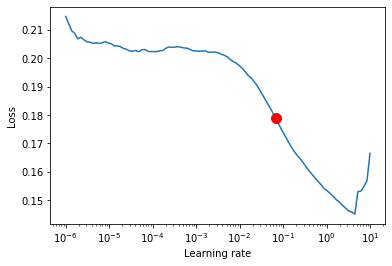

C:\Users\Xiaomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


In [45]:
# find optimal learning rate
res = trainer.tuner.lr_find(
    tft,
    train_dataloader=train_dataloader,
    val_dataloaders=val_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [46]:
# configure network and trainer
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

trainer = pl.Trainer(
    max_epochs=30,
    gpus=0,
    weights_summary="top",
    gradient_clip_val=0.1,
    limit_train_batches=30,  # coment in for training, running valiation every 30 batches
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    log_interval=10,  # uncomment for learning rate finder and otherwise, e.g. to 10 for logging every 10 batches
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

GPU available: False, used: False
TPU available: None, using: 0 TPU cores


Number of parameters in network: 18.2k



   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 0     
3  | prescalers                         | ModuleDict                      | 80    
4  | static_variable_selection          | VariableSelectionNetwork        | 1.7 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 1.2 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 1.2 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial_cell_lstm   | GatedResidualNetwork            | 1.1 

RuntimeError: index 198 is out of bounds for dimension 0 with size 25

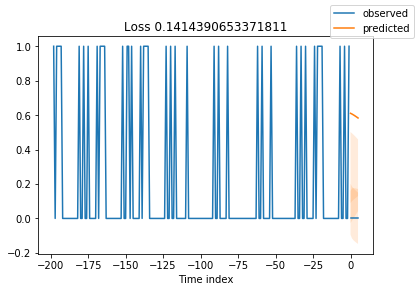

In [48]:
trainer.fit(
    tft,
    train_dataloader=train_dataloader,
    val_dataloaders=val_dataloader,
)

# Catboost

In [12]:
y = train_dt['forecast'].values.astype('int32')
del train_dt['forecast']
X = train_dt.values

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [15]:
model.fit(X_train, y_train)

C:\Users\Xiaomi\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
preds = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

print(accuracy_score(preds, y_test))

0.8138613861386138


In [18]:
model.predict_proba(X_test)

array([[0.79817192, 0.20182808],
       [0.73798928, 0.26201072],
       [0.19957919, 0.80042081],
       ...,
       [0.6900819 , 0.3099181 ],
       [0.49020635, 0.50979365],
       [0.07782222, 0.92217778]])